***Genetic Algorithm and Its Applications***

In [262]:
#Question 1: Answer is A

import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

**Exercise 1: Read data from csv**

In [263]:
def load_data_from_file(fileName = 'advertising.csv'):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    featurex_X = data[:, :3]
    sales_Y = np.array(data[:,3])
    featurex_X = np.array([[1, x1, x2, x3] for x1, x2, x3 in zip(featurex_X[:,0],
                                                                  featurex_X[:,1], featurex_X[:,2])])
    return featurex_X, sales_Y

In [264]:
features_X, _ = load_data_from_file()
features_X[:5,:]

# Quesion 2: Answer is A

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [265]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

# Question 3: Answer is B

(200,)


**Exercise 2: Create values for each chromosome**

In [314]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = []
    individual = [generate_random_value() for i in range(n)] 
    return individual

individual = create_individual()
print(individual)

[3.0481710101225867, -0.9291077399451075, -1.137455796246143, 1.9710826498318812]


**Exercise 3: Fitness function**

In [273]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

# Question 4: Answer is C

1.0185991537088997e-06


**Exercise 4: Crossover between 2 chromosomes**

In [274]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1)):
        if random.random() <= crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [275]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

# Question 5: Answer is D

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


**Exercise 5: mutation with chromosome**

In [315]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() <= mutation_rate:
            individual_m[i] = generate_random_value()
    
    return individual_m

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

# Question 6: Answer is A

False


**Exercise 6: Initialize population**

In [277]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

**Exercise 7: Selection**

In [278]:
def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break
    
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s

**Exercise 8: Create new population**

In [279]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])
    
    new_populaton = []
    while len(new_populaton) < m-elitism:
        #selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        #crossover
        individual_c1, individual_c2 = crossover(individual1, individual2)

        #mutaion
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_populaton.append(individual_m1)
        new_populaton.append(individual_m2)
        
    #elitism
    for i in sorted_population[m-elitism:]:
        new_populaton.append(i.copy())
    
    return new_populaton, compute_loss(sorted_population[m-1])

In [280]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

# Question 7: Answer is A

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


**Exercise 9: All in one**

In [316]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return losses_list, population

**Exercise 10: Visualize loss values**

Best loss: 1047.31357770483 with chromosome:  [-2.561091804856791, -0.06733816129833592, -0.6570582153154148, 1.517133313797402]
Best loss: 842.4557910160415 with chromosome:  [-1.3936451236574998, -0.12265262247973752, 1.8312521509489044, -0.513046123869324]
Best loss: 824.933134697745 with chromosome:  [-1.3936451236574998, -0.12265262247973752, 1.5825215481864763, -0.513046123869324]
Best loss: 306.3928929614944 with chromosome:  [-3.089962951701427, 0.11560712541826001, -0.8904985244590757, 0.44853278465300406]
Best loss: 306.3928929614944 with chromosome:  [-3.089962951701427, 0.11560712541826001, -0.8904985244590757, 0.44853278465300406]
Best loss: 154.4612752067016 with chromosome:  [-3.089962951701427, 0.11560712541826001, -0.5583184900852955, 0.44853278465300406]
Best loss: 154.4612752067016 with chromosome:  [-3.089962951701427, 0.11560712541826001, -0.5583184900852955, 0.44853278465300406]
Best loss: 60.3350236128044 with chromosome:  [4.669345504426957, 0.021497546574636983

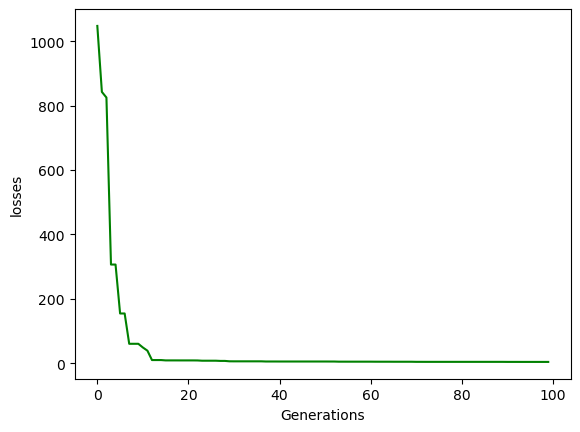

In [317]:
def visualize_loss(losses_list):
    plt.plot(losses_list, c='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

**Exercise 11: Visualize predicted sales and actual sales**

[2.532227018544524, 0.06635338179919903, 0.09080763321580809, 0.0252698707641974]


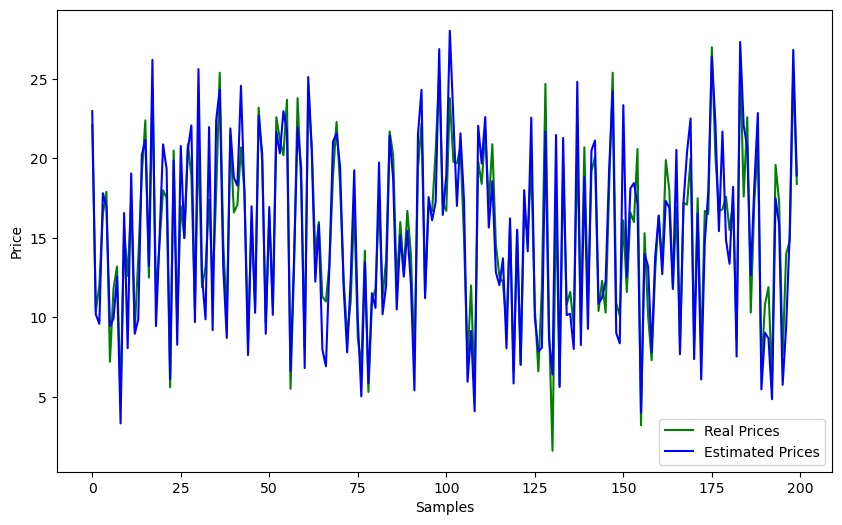

In [318]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        predict_price = feature.dot(theta)
        estimated_prices.append(predict_price)
    
    fig, ax = plt.subplots(figsize=(10,6))
    plt.xlabel('Samples')
    plt.ylabel("Price")
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label = 'Estimated Prices')
    #plt.ylim(0,30)
    plt.legend()
    plt.show()

visualize_predict_gt()